# Homework 4: Image Segmentation and Pixel Classification

Name: Syed Zain Raza

In [34]:
# optional: allow Jupyter to "hot reload" the Python modules I wrote, to avoid restarting the kernel after every change
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
import glob

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import util
from util.clustering import KMeans

DATA_PATH = "./cs558F21_HW4_data/*"

In [8]:
img_paths = glob.glob(DATA_PATH)

In [9]:
print(img_paths)

['./cs558F21_HW4_data/sky', './cs558F21_HW4_data/white-tower.png', './cs558F21_HW4_data/wt_slic.png']


## Problem 1: K-Means Segmentation

In [10]:
white_tower_img = util.load_image(
    img_paths[1],
    return_array=True,
    return_grayscale=False,
)

Dimensions of ./cs558F21_HW4_data/white-tower.png: 720 x 1280 x 3


In [11]:
rgb_side_by_side = np.reshape(white_tower_img, (-1, 3), order="C")

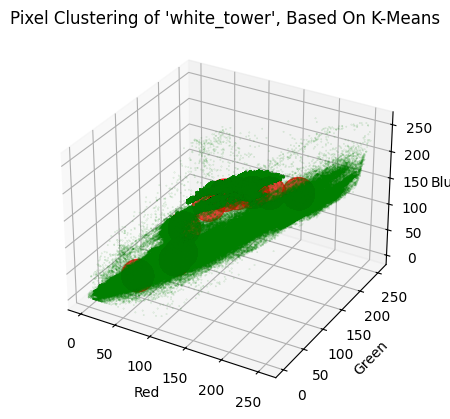

In [38]:
KMeans.fit_and_visualize(
    rgb_side_by_side,
    {"x": "Red", "y": "Green", "z": "Blue"},
    num_clusters=10,
    plot_title="Pixel Clustering of 'white_tower', Based On K-Means",
    max_iter=1,
)